# twStock notebook

------


## 目的
1. 擷取台股即時資料分析
2. 分析個股定期不定額
3. **注意台股TWSE 有request limit** _(每5秒鐘3個request,過的話會被封鎖ip至少20分鐘以上)_
4. https://www.twse.com.tw/zh/
------

### 基本功能測試

In [7]:
import twstock
from twstock import Stock
from twstock import BestFourPoint
import pandas as pd
import numpy as np
import matplotlib as plt
import time
import datetime

stockNumberID = '2412' #2412 中華電    2892 第一金 
start = time.time()
stock = Stock(stockNumberID)          # 擷取股價
stock.fetch_from(2020, 6)
done = time.time()
elapsed = int(done - start)
print('Time used: '+ str(elapsed) + 'sec for request time limit')
info = twstock.codes[stockNumberID] 
print(type(info.start))
print(info.start)

fetch from 2020/5, time:4 fetch from 2020/6, time:7 fetch from 2020/7, time:3 fetch from 2020/6, time:3 fetch from 2020/7, time:5 Time used: 22sec for request time limit
<class 'str'>
2000/10/27


### 近五日的收盤價

In [8]:
print(stock.price[-5:])

[117.0, 116.5, 114.0, 112.0, 112.0]


### 近五日的最高價

In [3]:
print(stock.high[-5:])

[117.0, 117.0, 114.0, 114.0, 112.5]


### 近五日的最低價

In [4]:
print(stock.low[-5:])

[115.0, 116.0, 110.5, 112.0, 111.5]


### 定期不定額回歸線
* 畫出多年 
  * 股票價
  * 成交量
  * 高低峰值回歸線

In [2]:
import twstock
import pandas as pd

# 這是抓取歷史資料
stock = twstock.Stock(stockNumberID)
info = twstock.codes[stockNumberID] 
stock_from = stock.fetch_from(2000,10)     # 獲取 2010 年 01 月至今日之股票資料
stock_from_pd = pd.DataFrame(stock_from)
stock_from_pd = stock_from_pd.set_index('date')

fetch from 2020/5, time:7 fetch from 2020/6, time:3 fetch from 2020/7, time:8 fetch from 2000/10, time:7 fetch from 2000/11, time:7 fetch from 2000/12, time:6 fetch from 2001/1, time:6 fetch from 2001/2, time:9 fetch from 2001/3, time:9 fetch from 2001/4, time:9 fetch from 2001/5, time:7 fetch from 2001/6, time:4 fetch from 2001/7, time:3 fetch from 2001/8, time:7 fetch from 2001/9, time:9 fetch from 2001/10, time:4 fetch from 2001/11, time:6 fetch from 2001/12, time:5 fetch from 2002/1, time:3 fetch from 2002/2, time:4 fetch from 2002/3, time:4 fetch from 2002/4, time:7 fetch from 2002/5, time:4 fetch from 2002/6, time:4 fetch from 2002/7, time:7 fetch from 2002/8, time:7 fetch from 2002/9, time:9 fetch from 2002/10, time:4 fetch from 2002/11, time:9 fetch from 2002/12, time:3 fetch from 2003/1, time:7 fetch from 2003/2, time:7 fetch from 2003/3, time:5 fetch from 2003/4, time:6 fetch from 2003/5, time:3 fetch from 2003/6, time:7 fetch from 2003/7, time:7 fetch from 2003/8, time:4 fet

In [3]:
print(type(stock_from_pd))
print(stock_from_pd.loc[stock_from_pd['close'].idxmax()].close)
print(stock_from_pd.loc[stock_from_pd['close'].idxmin()].close)
print(len(stock_from_pd))
stock_from_pd.head()

<class 'pandas.core.frame.DataFrame'>
124.0
58.1
2560


,capacity,turnover,open,high,low,close,change,transaction
date,,,,,,,,
2010-01-04,14947670,885880317,59.5,59.6,59.1,59.3,-0.2,5186
2010-01-05,16020545,950201764,59.3,59.5,59.2,59.4,0.1,4787
2010-01-06,21835678,1297482332,59.3,59.7,59.2,59.6,0.2,6301
2010-01-07,58817538,3449001637,59.2,59.3,58.2,58.4,-1.2,19530
2010-01-08,44405291,2586840886,58.2,58.8,57.9,58.1,-0.3,10103


C:\Users\joyts\AppData\Local\Programs\Python\Python36\Lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


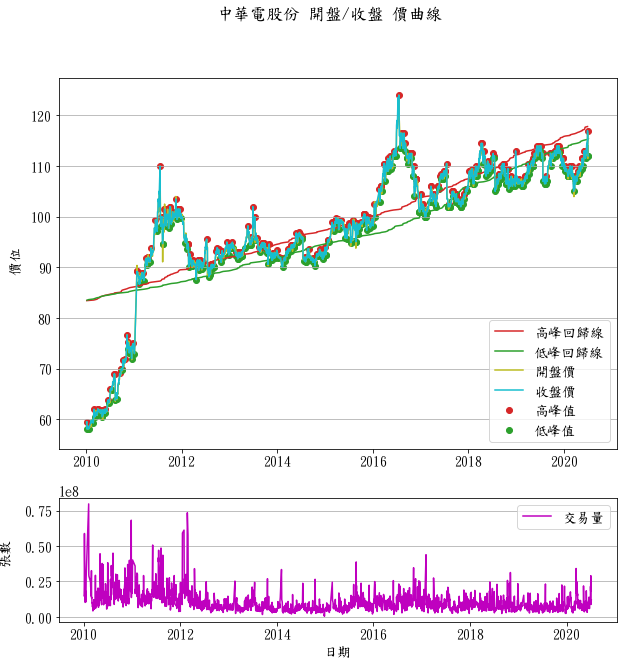

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from sklearn import linear_model
import datetime as dt
from sklearn.linear_model import LinearRegression

#設定中文字型
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '14'}
plt.rc('font', **font) # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False)

#畫圖
fig, (ax1, ax2) = plt.subplots(2, gridspec_kw={'height_ratios': [3, 1]},figsize=(10, 10))
stockTitle = info.name + '股份 開盤/收盤 價曲線'
fig.suptitle(stockTitle)

#setting index as date
# print(stock_from_pd.info(verbose=True))
# print(stock_from_pd.head())
# df = stock_from_pd.reset_index()
# print(df.head())

# Find local peaks
n=5 # number of points to be checked before and after 
stock_from_pd['min'] = stock_from_pd.iloc[argrelextrema(stock_from_pd.close.values, np.less_equal, order=n)[0]]['close']
stock_from_pd['max'] = stock_from_pd.iloc[argrelextrema(stock_from_pd.close.values, np.greater_equal, order=n)[0]]['close']

# Plot results
ax1.scatter(stock_from_pd.index, stock_from_pd['max'], label="高峰值", c='tab:red')
ax1.scatter(stock_from_pd.index, stock_from_pd['min'], label="低峰值", c='tab:green')

#Linear Regression
regr=linear_model.LinearRegression()
highData = stock_from_pd['max'].dropna()
X = highData.index.factorize()[0].reshape(-1,1)
y = highData.values
regr.fit(X,y)
arrPredict = regr.predict(X)
dataframePredict = pd.DataFrame({'Predict':arrPredict})
dataframehighData = pd.DataFrame(highData)
dataframehighData['Predict'] = dataframePredict['Predict'].values
ax1.plot(dataframehighData.Predict, '-' , label="高峰回歸線", c='tab:red')

lowData = stock_from_pd['min'].dropna()
_X = lowData.index.factorize()[0].reshape(-1,1)
_y = lowData.values
regr.fit(_X,_y)
_arrPredict = regr.predict(_X)
_dataframePredict = pd.DataFrame({'Predict':_arrPredict})
dataframelowData = pd.DataFrame(lowData)
dataframelowData['Predict'] = _dataframePredict['Predict'].values
ax1.plot(dataframelowData.Predict, '-' , label="低峰回歸線", c='tab:green')


ax1.plot(stock_from_pd.open, '-' , label="開盤價", c='tab:olive')
ax1.plot(stock_from_pd.close, '-' , label="收盤價", c='tab:cyan')
ax1.set_ylabel('價位')
ax1.grid(True, axis='y')
ax1.legend()
ax2.set_xlabel('日期')
ax2.set_ylabel('張數')
ax2.grid(True, axis='y')
ax2.plot(stock_from_pd.capacity, '-' , label="交易量", c='m')
ax2.legend()

fig.savefig('day200706.png')
fig.show()

#  瑞耘
* 四大買賣點分析

In [ ]:
import twstock
from twstock import Stock
from twstock import BestFourPoint
import pandas as pd
import numpy as np

print(twstock.codes['6532'].name)
print(twstock.codes['6532'].start)
print(twstock.codes['6532'])   

stock = Stock('6532')               # 擷取股價
bfp = BestFourPoint(stock)
print('\n判斷是否為四大 買點')
print(bfp.best_four_point_to_buy())    # 判斷是否為四大買點
print('\n判斷是否為四大 賣點')
print(bfp.best_four_point_to_sell())   # 判斷是否為四大賣點
print('\n綜合判斷')
print(bfp.best_four_point())           # 綜合判斷

ma_p = stock.moving_average(stock.price, 5)       # 計算五日均價
ma_c = stock.moving_average(stock.capacity, 5)    # 計算五日均量
ma_p_cont = stock.continuous(ma_p)                # 計算五日均價持續天數
ma_br = stock.ma_bias_ratio(5, 10)                # 計算五日、十日乖離值
d = {'ma_p': ma_p, 'ma_c': ma_c}
df = pd.DataFrame(data=d)
print('\n計算五日均價持續天數:')
print(ma_p_cont)
print('\n計算 ma_p(五日均價) ma_c(五日均量):')
print(df)

twstock.realtime.get('6532')    # 擷取當前股票資訊
twstock.realtime.get(['6532'])  # 擷取當前三檔資訊

## 基本操作
* 匯入twstock library:

In [ ]:
from twstock import Stock

stock = Stock('2892')                             # 擷取第一金股價
ma_p = stock.moving_average(stock.price, 5)       # 計算五日均價
ma_c = stock.moving_average(stock.capacity, 5)    # 計算五日均量
ma_p_cont = stock.continuous(ma_p)                # 計算五日均價持續天數
ma_br = stock.ma_bias_ratio(5, 10)                # 計算五日、十日乖離值

In [ ]:
ma_p_cont

In [ ]:
import pandas as pd
import numpy as np
d = {'ma_p': ma_p, 'ma_c': ma_c}
df = pd.DataFrame(data=d)
df

In [ ]:
import pandas as pd
import numpy as np

d = {'ma_br': ma_br}
df = pd.DataFrame(data=d)
df

* 擷取自 2015 年 1 月至今之資料

In [ ]:
stock.fetch_from(2015, 1)

* 基本資料之使用:

In [ ]:
stock.price

In [ ]:
stock.capacity

In [ ]:
stock.data[0]

------

## 附件：Juypter Notebook 基本操作 

### Jupyter Notebook 基本操作介紹影片:

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HW29067qVWk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

------
### Juypter % 及 %% 外掛程式運用:

In [ ]:
%lsmagic

### 圖表基本操作 (matplot library):

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### 計算時間:

In [ ]:
%%timeit
square_evens = [n*n for n in range(1000)]

### 資料呈現(panda):

* 解決ImportError: cannot import name 'nosetester'問題:
  * numpy 1.11.1 version
    * pip3 uninstall numpy
    * pip3 install numpy==1.11.1
  * pandas 0.19.2 version 
    * pip3 uninstall pandas
    * pip3 install pandas==0.19.2

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10,5))
df.head()
